# Observations check

Scratch to make sure that observations received by ecco package really are only at 2 mooring locations

In [13]:
import sys 
sys.path.append('../')
import matplotlib.pyplot as plt
from pig_tools import diag_plot
from xmitgcm import open_mdsdataset
import MITgcmutils as mut
import numpy as np

In [14]:
run_dir= '/workspace/ase-adjoint/pig/generic/shicoeff_optim_istar_month/run_ad_08.10/'

ds = open_mdsdataset(data_dir=('%s/diags' % run_dir),
                     grid_dir='/workspace/grids/pig_08/'
                    )

In [19]:
m_theta = mut.rdmds(fnamearg=('%s/m_theta' % run_dir),itrs=10)
m_salt = mut.rdmds(fnamearg=('%s/m_salt' % run_dir),itrs=10)
misfits_theta = mut.rdmds(fnamearg=('%s/misfit_theta_obs' % run_dir))
misfits_salt = mut.rdmds(fnamearg=('%s/misfit_salt_obs' % run_dir))

In [20]:
print(np.shape(misfits_theta))

(50, 30, 25)


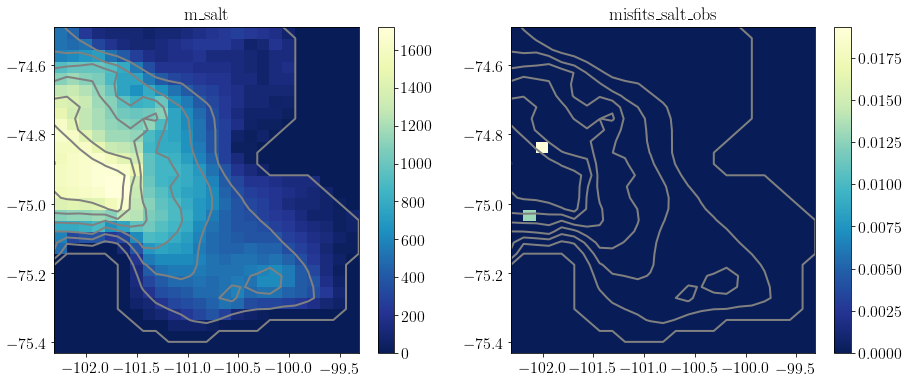

In [22]:
diag_plot(ds.XC,ds.YC,np.sum(m_theta,axis=0),np.sum(np.abs(misfits_theta),axis=0),
          title1='m\_theta',title2='misfits\_theta\_obs',
          depth=ds.Depth
         )
diag_plot(ds.XC,ds.YC,np.sum(m_salt,axis=0),np.sum(np.abs(misfits_salt),axis=0),
          title1='m\_salt',title2='misfits\_salt\_obs',
          depth=ds.Depth
         )